In [1]:
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [2]:
with open('data/pickles/features_29feat_clean.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,Graduation_Rate_School,Student_Count_Total,Zip_Mean_Income,Fully Accessible,Generally accessible,Student_Count_Asian_perc,Student_Count_Asian_Pacific_Islander_perc,Student_Count_Black_perc,Student_Count_English_Learners_perc,Student_Count_Ethnicity_Not_Available_perc,Student_Count_Hawaiian_Pacific_Islander_perc,Student_Count_Hispanic_perc,Student_Count_Low_Income_perc,Student_Count_Multi_perc,Student_Count_Native_American_perc,Student_Count_Other_Ethnicity_perc,Student_Count_Special_Ed_perc,Student_Count_White_perc,Classroom_Languages_count,Blue,Brown,Green,Orange,Pink,Purple,Red,Dress_Code_dummie,grades_offered_count,charter,gender_f_bn
0,80.9,1739,53353.0,0,1,0.003,0.0,0.033,0.190,0.006,0.0,0.945,0.954,0.002,0.003,0.0,0.162,0.007,2.0,1,0,0,0,1,0,1,0,4,0,0
1,78.6,1706,57770.0,0,1,0.006,0.0,0.031,0.201,0.008,0.0,0.943,0.626,0.004,0.004,0.0,0.162,0.006,2.0,1,0,0,0,1,0,1,0,4,0,0
2,82.8,742,53353.0,0,0,0.000,0.0,0.032,0.228,0.000,0.0,0.962,0.970,0.000,0.001,0.0,0.197,0.004,1.0,1,0,0,1,1,0,0,1,4,1,1
3,85.0,745,57770.0,0,0,0.000,0.0,0.019,0.286,0.001,0.0,0.974,0.930,0.000,0.003,0.0,0.196,0.003,1.0,1,0,0,1,1,0,0,1,4,1,1
4,1.7,199,53353.0,0,0,0.000,0.0,0.774,0.010,0.000,0.0,0.181,0.874,0.000,0.015,0.0,0.291,0.030,0.0,0,0,0,0,0,0,0,0,4,0,1


## 4 initial log transforms

In [23]:
df_lookslikelog = df[['Graduation_Rate_School','Student_Count_Total', 'Student_Count_Asian_perc', 
                      'Student_Count_Multi_perc', 'Student_Count_White_perc']]


#to deal with 0's set to .000001
df_lookslikelog.replace(0.000, 10**-10, inplace=True)
df_lookslikelog.sort_values('Student_Count_Asian_perc').head(20)



,Graduation_Rate_School,Student_Count_Total,Student_Count_Asian_perc,Student_Count_Multi_perc,Student_Count_White_perc
117,40.0,103,1.000e-10,1.942e-02,1.000e-10
88,78.6,425,1.000e-10,2.353e-03,1.000e-10
87,80.3,404,1.000e-10,7.426e-03,1.000e-10
86,75.2,428,1.000e-10,7.009e-03,1.000e-10
85,80.6,315,1.000e-10,9.524e-03,1.000e-10
84,73.1,329,1.000e-10,6.079e-03,1.000e-10
83,85.2,1341,1.000e-10,2.983e-03,1.000e-10
82,80.7,1339,1.000e-10,1.494e-03,7.468e-04
81,75.7,366,1.000e-10,2.732e-03,1.000e-10
80,69.7,351,1.000e-10,2.849e-03,1.000e-10


In [24]:
feature_for_logs = ['Student_Count_Total', 'Student_Count_Asian_perc', 
                      'Student_Count_Multi_perc', 'Student_Count_White_perc']
for feature in feature_for_logs:
    new_heading = feature + '_log'
    df_lookslikelog[new_heading] = np.log(df_lookslikelog[feature])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
df_lookslikelog.sort_values('Student_Count_Asian_perc', ascending=True).head(30)

,Graduation_Rate_School,Student_Count_Total,Student_Count_Asian_perc,Student_Count_Multi_perc,Student_Count_White_perc,Student_Count_Total_log,Student_Count_Asian_perc_log,Student_Count_Multi_perc_log,Student_Count_White_perc_log
117,40.0,103,1.000e-10,1.942e-02,1.000e-10,4.635,-23.026,-3.942,-23.026
88,78.6,425,1.000e-10,2.353e-03,1.000e-10,6.052,-23.026,-6.052,-23.026
87,80.3,404,1.000e-10,7.426e-03,1.000e-10,6.001,-23.026,-4.903,-23.026
86,75.2,428,1.000e-10,7.009e-03,1.000e-10,6.059,-23.026,-4.961,-23.026
85,80.6,315,1.000e-10,9.524e-03,1.000e-10,5.753,-23.026,-4.654,-23.026
84,73.1,329,1.000e-10,6.079e-03,1.000e-10,5.796,-23.026,-5.103,-23.026
83,85.2,1341,1.000e-10,2.983e-03,1.000e-10,7.201,-23.026,-5.815,-23.026
82,80.7,1339,1.000e-10,1.494e-03,7.468e-04,7.200,-23.026,-6.507,-7.200
81,75.7,366,1.000e-10,2.732e-03,1.000e-10,5.903,-23.026,-5.903,-23.026
80,69.7,351,1.000e-10,2.849e-03,1.000e-10,5.861,-23.026,-5.861,-23.026


In [26]:
len(df_lookslikelog[df_lookslikelog['Student_Count_Asian_perc_log'] == -np.inf])

0

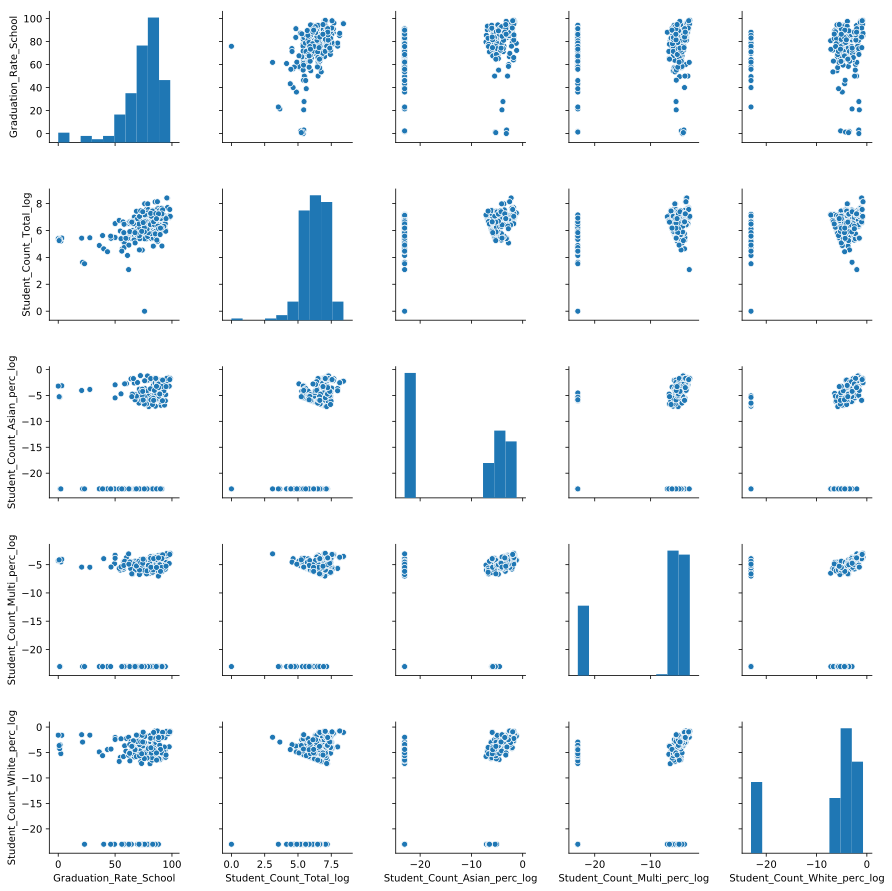

In [27]:
df_log_for_pp = df_lookslikelog[['Graduation_Rate_School','Student_Count_Total_log','Student_Count_Asian_perc_log',
                                 'Student_Count_Multi_perc_log','Student_Count_White_perc_log']]
sns.pairplot(df_log_for_pp)

In [ ]:
## Log Transform's removing outliers, i.e. 0 percentages